In [1]:
import numpy as np
import pandas as pd
from debugpy.launcher import channel
from scipy.signal import firwin, lfilter
from scipy import ndimage
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.chdir('/Users/admin/PycharmProjects/ET_eksploracja/hyperscanning-signal-analysis')
%matplotlib inline

In [2]:
import sys
sys.path.append('../src')
import dataloader
from data_structures import MultiModalDataPd

In [3]:
mmd = MultiModalDataPd("W_010")
mmd.add_data(eeg_path = "../data/eeg_data/")

Detected events: [{'name': 'Brave', 'start': 419.9169921875, 'duration': 59.33203125}, {'name': 'Peppa', 'start': 489.482421875, 'duration': 59.630859375}, {'name': 'Incredibles', 'start': 559.3466796875, 'duration': 59.212890625}, {'name': 'Talk_1', 'start': 696.431640625, 'duration': 181.0556640625}, {'name': 'Talk_2'}]
Based on EEG, setting fs to: 1024
Based on EEG, setting fs to: 1024


In [4]:
mmd.data.head()

,time,time_idx,events,EEG_ch_Fp1,EEG_ch_Fp2,EEG_ch_F7,EEG_ch_F3,EEG_ch_Fz,EEG_ch_F4,EEG_ch_F8,...,EEG_cg_T5,EEG_cg_P3,EEG_cg_Pz,EEG_cg_P4,EEG_cg_T6,EEG_cg_O1,EEG_cg_O2,ECG_cg,ECG_ch,DIODE
0,-419.916992,-429995.0,none,-0.166729,0.928759,-2.387107,0.376915,1.673674,1.889244,1.098599,...,-1850.169922,5987.374512,-4118.006836,-3994.955566,3873.190918,4105.565918,3913.374023,-33.076484,18.400644,0.0
1,-419.916016,-429994.0,none,-1.841399,-0.798035,-6.948543,-5.137810,-2.989853,-2.620005,0.103316,...,-1859.214600,5977.542969,-4129.554199,-3988.413330,3865.004150,4093.589600,3906.616943,-34.794187,19.719169,0.0
2,-419.915039,-429993.0,none,-3.410958,-2.386676,-11.320718,-10.479302,-7.465961,-6.954714,-0.882804,...,-1881.987305,5957.630371,-4151.826660,-3989.592773,3846.378418,4068.314453,3886.132324,-36.667787,21.107556,0.0
3,-419.914062,-429992.0,none,-4.874991,-3.774457,-15.378470,-15.501312,-11.612288,-10.977433,-1.850761,...,-1904.724365,5935.751465,-4172.990234,-3990.093262,3828.145996,4048.008301,3871.117676,-35.325327,22.571127,0.0
4,-419.913086,-429991.0,none,-6.242751,-4.918333,-19.012081,-20.071709,-15.306170,-14.568031,-2.798414,...,-1925.352051,5916.053711,-4197.193359,-3995.777588,3812.737549,4030.740967,3857.496826,-35.968955,24.106001,0.0


In [5]:
mmd.data.events.unique()

array(['none', 'Brave', 'Peppa', 'Incredibles', 'Talk_1'], dtype=object)

In [6]:
mmd.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907616 entries, 0 to 907615
Data columns (total 48 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        907616 non-null  float64
 1   time_idx    907616 non-null  float64
 2   events      907616 non-null  object 
 3   EEG_ch_Fp1  907616 non-null  float32
 4   EEG_ch_Fp2  907616 non-null  float32
 5   EEG_ch_F7   907616 non-null  float32
 6   EEG_ch_F3   907616 non-null  float32
 7   EEG_ch_Fz   907616 non-null  float32
 8   EEG_ch_F4   907616 non-null  float32
 9   EEG_ch_F8   907616 non-null  float32
 10  EEG_ch_M1   907616 non-null  float32
 11  EEG_ch_T3   907616 non-null  float32
 12  EEG_ch_C3   907616 non-null  float32
 13  EEG_ch_Cz   907616 non-null  float32
 14  EEG_ch_C4   907616 non-null  float32
 15  EEG_ch_T4   907616 non-null  float32
 16  EEG_ch_M2   907616 non-null  float32
 17  EEG_ch_T5   907616 non-null  float32
 18  EEG_ch_P3   907616 non-null  float32
 19  EE

## Test plot of diode signal colored by events

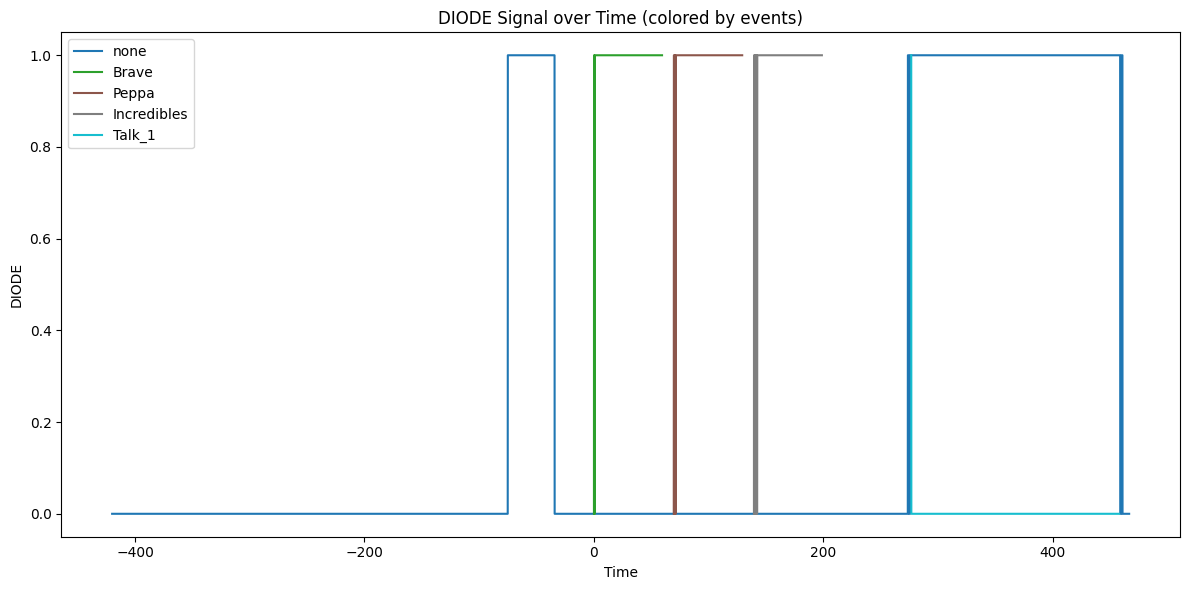

In [7]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique events for color mapping
events = mmd.data['events'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(events)))
event_colors = dict(zip(events, colors))

# Plot DIODE values colored by events
for event in events:
    event_data = mmd.data[mmd.data['events'] == event]
    ax.plot(event_data['time'], event_data['DIODE'], label=event, color=event_colors[event])

ax.set_xlabel('Time')
ax.set_ylabel('DIODE')
ax.set_title('DIODE Signal over Time (colored by events)')
ax.legend()
plt.tight_layout()
plt.show()

In [8]:
mmd.add_data(et_path = "../data/et_data/")

min 347.531023743903
max 1056.456152707318


In [9]:
mmd.data.head()

,time_x,time_idx,events,EEG_ch_Fp1,EEG_ch_Fp2,EEG_ch_F7,EEG_ch_F3,EEG_ch_Fz,EEG_ch_F4,EEG_ch_F8,...,ch_diameter3d,ET_ch_diameter3d,cg_diameter3d,ET_cg_diameter3d,cg_blinks,ET_cg_blinks,ch_blinks,ET_ch_blinks,event,ET_event
0,-419.916992,-429995.0,none,-0.166729,0.928759,-2.387107,0.376915,1.673674,1.889244,1.098599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-419.916016,-429994.0,none,-1.841399,-0.798035,-6.948543,-5.137810,-2.989853,-2.620005,0.103316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-419.915039,-429993.0,none,-3.410958,-2.386676,-11.320718,-10.479302,-7.465961,-6.954714,-0.882804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-419.914062,-429992.0,none,-4.874991,-3.774457,-15.378470,-15.501312,-11.612288,-10.977433,-1.850761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-419.913086,-429991.0,none,-6.242751,-4.918333,-19.012081,-20.071709,-15.306170,-14.568031,-2.798414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mmd.data.columns

Index(['time_x', 'time_idx', 'events', 'EEG_ch_Fp1', 'EEG_ch_Fp2', 'EEG_ch_F7',
       'EEG_ch_F3', 'EEG_ch_Fz', 'EEG_ch_F4', 'EEG_ch_F8', 'EEG_ch_M1',
       'EEG_ch_T3', 'EEG_ch_C3', 'EEG_ch_Cz', 'EEG_ch_C4', 'EEG_ch_T4',
       'EEG_ch_M2', 'EEG_ch_T5', 'EEG_ch_P3', 'EEG_ch_Pz', 'EEG_ch_P4',
       'EEG_ch_T6', 'EEG_ch_O1', 'EEG_ch_O2', 'EEG_cg_Fp1', 'EEG_cg_Fp2',
       'EEG_cg_F7', 'EEG_cg_F3', 'EEG_cg_Fz', 'EEG_cg_F4', 'EEG_cg_F8',
       'EEG_cg_M1', 'EEG_cg_T3', 'EEG_cg_C3', 'EEG_cg_Cz', 'EEG_cg_C4',
       'EEG_cg_T4', 'EEG_cg_M2', 'EEG_cg_T5', 'EEG_cg_P3', 'EEG_cg_Pz',
       'EEG_cg_P4', 'EEG_cg_T6', 'EEG_cg_O1', 'EEG_cg_O2', 'ECG_cg', 'ECG_ch',
       'DIODE', 'time_y', 'ET_ch_x', 'ET_ch_y', 'ET_cg_x', 'ET_cg_y',
       'ch_diameter3d', 'ET_ch_diameter3d', 'cg_diameter3d',
       'ET_cg_diameter3d', 'cg_blinks', 'ET_cg_blinks', 'ch_blinks',
       'ET_ch_blinks', 'event', 'ET_event'],
      dtype='object')

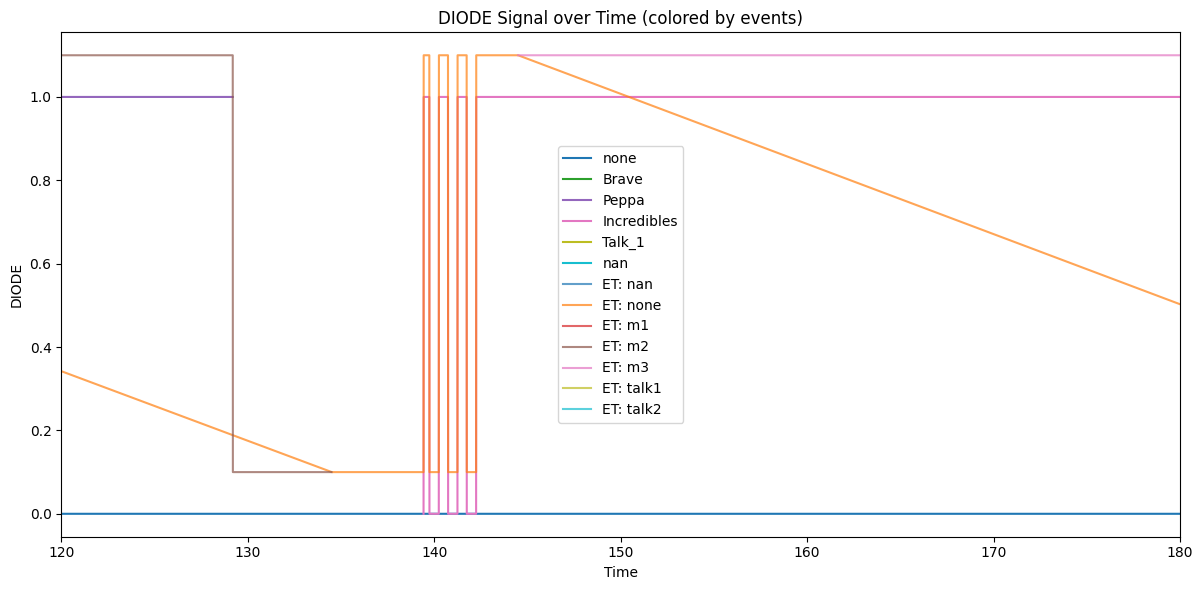

In [12]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique events for color mapping
events = mmd.data['events'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(events)))
event_colors = dict(zip(events, colors))

# Plot DIODE values colored by events
for event in events:
    event_data = mmd.data[mmd.data['events'] == event]
    ax.plot(event_data['time_x'], event_data['DIODE'], label=event, color=event_colors[event])


# add plots of DIODE vs time_idx colored based on ET_events
et_events = mmd.data['ET_event'].unique()
et_colors = plt.cm.tab10(np.linspace(0, 1, len(et_events)))
et_event_colors = dict(zip(et_events, et_colors))

for et_event in et_events:
    et_event_data = mmd.data[mmd.data['ET_event'] == et_event]
    ax.plot(et_event_data['time_x'], et_event_data['DIODE']+0.1, label=f'ET: {et_event}', color=et_event_colors[et_event], linestyle='-', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('DIODE')
ax.set_title('DIODE Signal over Time (colored by events)')
ax.legend()
plt.tight_layout()
plt.xlim(120, 180)
plt.show()